<hr style="height:10px"> 
 
<div class='container2'>
        <h4> <a href="https://www.linkedin.com/in/jdlamosa/">Jéssica Domingues Lamosa</a>
    </div>
</div>







<hr style="height:5px"> 
    
<h2>Introduction - K-Nearest Neighbors Algorithm </h2>

 <hr style="height:2px"> 

<br>
<br>

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature.

* The null hypothesis is that data that are not similar and will not be concentrated in the same region in the input space. Alternatively, similar data tends to be concentrated.

* The nearest neighbor algorithm has variations defined by the number of neighbors considered.
</center>

--- 
<div class='container2'>
    <h2>Data set: </h2> <h4> <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/">Breast Cancer Wisconsin</h2>
    </div>
</div>






---
## Description

Number of instances: 569 

* Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

* Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

---

## Resources

For this notebook, Python 3.5 or higher must be used with the following libraries, which must be installed:

* [`plotly`](https://plotly.com/) (version 5.1.0 or higher): building and displaying graphics
* [`matplotlib`](https://matplotlib.org/) (version 3.1.3 or higher): construction and display of graphics
* [`seaborn`](https://seaborn.pydata.org/) (version 0.10.0 or higher): construction and display of graphics
* [`numpy`](https://numpy.org) (version 1.16.2 or higher): data manipulation in vector and matrix format
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (version 0.24.1 or higher): data manipulation in table format
* [`scikit-learn`](https://scikit-learn.org/stable/)  (version 0.22.1 or higher): set of methods and templates useful for Machine Learning and Artificial Intelligence

The datasets provided with this *notebook* will also be used, which is located in the `datasets` directory, in the `.data` file format.

In [1]:
import numpy as np # import the library used to work with vectors and matrices
import pandas as pd # import the library used to work with dataframes (data in table format) and data analysis
import sklearn as skl # importa o sckit-learn
from sklearn import preprocessing  #required for StandardScaler

# libraries used for generating graphics
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# importa alguns pacotes do sckit-learn
from sklearn import neighbors # necessario para usar o metodo KNN

print('Loaded libraries!')

Loaded libraries!


In [2]:
# importing the file and saving it to a Pandas dataframe
data = pd.read_csv( 'dataset/wdbc.data', header=None) 
print('Database imported!')

Database imported!


In [3]:
display(data.head(n=5))


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [5]:
df_dataset = data.drop(columns=[0])

In [6]:
df_details = df_dataset.describe()
display(df_details)

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#StandardScaler function

scaler = preprocessing.StandardScaler().fit(df_dataset.iloc[:,1:])
df_dataset.iloc[:,1:] = scaler.transform(df_dataset.iloc[:,1:])

In [8]:
df_details = df_dataset.describe()
display(df_details.round(8))

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
std,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,...,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880,1.000880
min,-2.029648,-2.229249,-1.984504,-1.454443,-3.112085,-1.610136,-1.114873,-1.261820,-2.744117,-1.819865,...,-1.726901,-2.223994,-1.693361,-1.222423,-2.682695,-1.443878,-1.305831,-1.745063,-2.160960,-1.601839
25%,-0.689385,-0.725963,-0.691956,-0.667195,-0.710963,-0.747086,-0.743748,-0.737944,-0.703240,-0.722639,...,-0.674921,-0.748629,-0.689578,-0.642136,-0.691230,-0.681083,-0.756514,-0.756400,-0.641864,-0.691912
50%,-0.215082,-0.104636,-0.235980,-0.295187,-0.034891,-0.221940,-0.342240,-0.397721,-0.071626,-0.178279,...,-0.269040,-0.043516,-0.285980,-0.341181,-0.046843,-0.269501,-0.218232,-0.223469,-0.127409,-0.216444
75%,0.469393,0.584176,0.499677,0.363507,0.636199,0.493857,0.526062,0.646935,0.530779,0.470983,...,0.522016,0.658341,0.540279,0.357589,0.597545,0.539669,0.531141,0.712510,0.450138,0.450762
max,3.971288,4.651889,3.976130,5.250529,4.770911,4.568425,4.243589,3.927930,4.484751,4.910919,...,4.094189,3.885905,4.287337,5.930172,3.955374,5.112877,4.700669,2.685877,6.046041,6.846856


In [9]:
display(df_dataset.head(n=5))

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Pre-processing: detection of *outliers*

Density graphs can show outliers. These outliers can be rare events or errors.

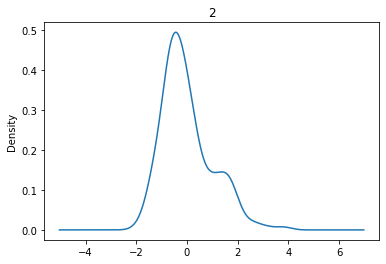

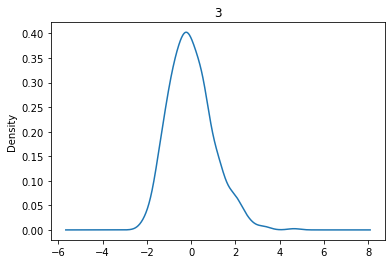

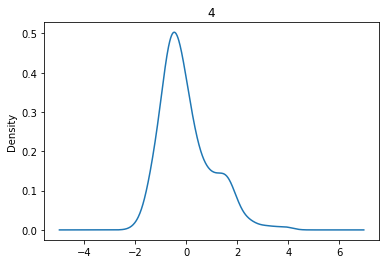

In [10]:
for feature in df_dataset.columns[1:4]: 

    # creating the density graph for 3 features (example)
    densityplot = df_dataset[feature].plot(kind='density')
    
    plt.title(feature)
    plt.show()

In [11]:
df_dataset[1].unique()

array(['M', 'B'], dtype=object)

In [12]:
# get the values of the 1 to n-1 columns and store them in a matrix X
X = df_dataset.iloc[:,1:].values

In [13]:
#values of classes: 0 for malignant and 1 for benign

Y=df_dataset[1].map({'M':0,'B':1}).astype(int)

In [14]:
#generates a division of data into
#training and testing, with 80% of data for training and 20% for testing
#seed defined to reproduce the experiment

cv = skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

# returns training and testing indexes
train_index, test_index = list( cv.split(X, Y) )[0]

# returns training and testing partitions according to indices
X_train, X_test = X[train_index, :], X[test_index, :];
Y_train, Y_test = Y[train_index], Y[test_index];

print('Training data: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Test data: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

# prints the percentage of training data for each class
print("\nData of each class (training)")
cTrain, counts_cTrain = np.unique(np.sort(Y_train), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClass %s: %d (%1.2f%%)' %( cTrain[i],counts_cTrain[i],(counts_cTrain[i]/len(Y_train))*100 ) )

 # prints the percentage of test data for each class
print("\nData of each class (test)")
cTest, counts_cTest = np.unique(np.sort(Y_test), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClass %s: %d (%1.2f%%)' %( cTest[i],counts_cTest[i],(counts_cTest[i]/len(Y_test))*100 ) )


Training data: 455 (79.96%)
Test data: 114 (20.04%)

Data of each class (training)
	Class 0: 170 (37.36%)
	Class 1: 285 (62.64%)

Data of each class (test)
	Class 0: 42 (36.84%)
	Class 1: 72 (63.16%)


---
Choosing the appropriate K value for a specific decision problem may not be trivial. Often the value of k is small and odd. In classification problems with two classes (like this one) it is not usual to use k = 2 or even values to avoid a draw.



In [15]:
# load the classifier
classifier = skl.neighbors.KNeighborsClassifier(n_neighbors=3)

# train the classifier with training data
classifier.fit(X_train, Y_train) 
 
# classifier the test data
Y_pred = classifier.predict(X_test) 
        
print('\nPrediction obtained for the first 10 test samples:\n', Y_pred[0:10])


Prediction obtained for the first 10 test samples:
 [1 0 1 1 0 1 1 1 0 1]


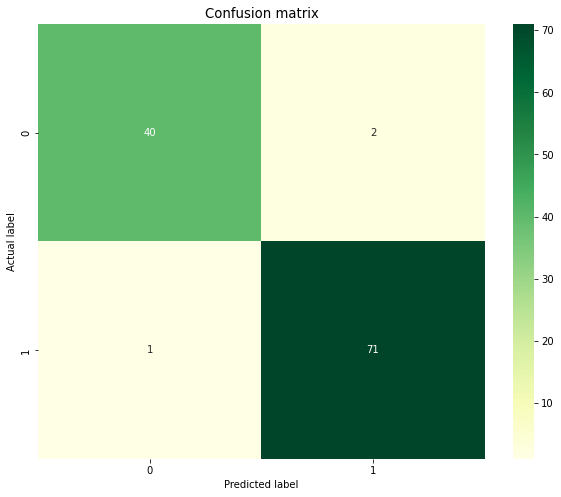

In [16]:
# get the classes
classesDataset = np.unique(Y_train)


# get the confusion matrix
cm = skl.metrics.confusion_matrix(Y_test, Y_pred)

# plot 

# the figure size
plt.figure(figsize=(10,8))
    
#creates a colormap of the confusion matrix values
sns.heatmap(cm, xticklabels=classesDataset, yticklabels=classesDataset, cmap="YlGn", annot=True)
sns.set(font_scale=1.1) # aumenta a escala das fontes do grafico
        
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



---
### k-nn is a memory-based algorithm, the learning process is just memorizing objects. This algorithm represents one of the best known paradigms of inductive learning: objects with similar characteristics belong to the same group.